<a href="https://colab.research.google.com/github/MINGofHope/RL-Frozen-Leak/blob/master/Frozen_Lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents
- Problem statement 
- 
- Environment initialization
- Q Learning
  - Reinforcement Learning & Markov Decision Process (MDP)
  - Bellman Equation
  - Q Tables & Learning intuition and its **implementation**
  - Exploration and Exploiration

- Deep Q Learning (DQN)
  - Definition 
  - Significance 
  - Implementation

- Performance evalution
  - Render
  - Success rate vs. Eposides
  - Comparison between QL and QLN 

- References



# Environment

In [1]:
# !pip install gym[toy_text]

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)

n_ob = env.observation_space.n
n_act = env.action_space.n
print(n_ob, n_act)
# env.render()

16 4


# Q-Learning

## Q0 - Random 

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 10})

In [5]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
n0_success = 0
result = []
result_arr_0 = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result.append('Failure')
  result_arr_0.append(0)

  while not done:

    a = env.action_space.sample()

    n_s, reward, done, info = env.step(a)

    if reward:
      n0_success += 1
      result[-1] = 'Success'
      result_arr_0[-1] = reward
      break
    
  

True


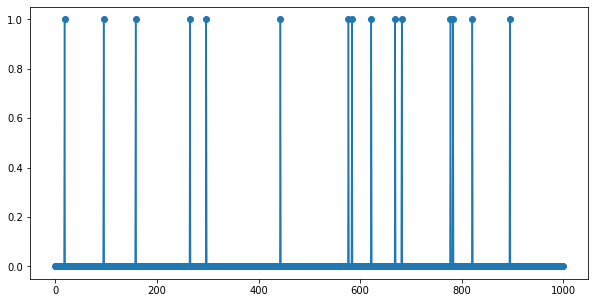

In [6]:
plt.plot(result_arr_0)
print(np.sum(result_arr_0) == n0_success)
plt.scatter(range(n_eps),result_arr_0)

## Q1 - Greedy

In [7]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
result_arr_1 = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result_arr_1.append(0) 

  while not done:

    # Use previous knowledge (exploitation) - choose action with the highest 
    # q value if applicable, otherwise random exploration  
    if np.max(q[s]) > 0:
      a = np.argmax(q[s])
    else:
      a = env.action_space.sample()

    n_s, reward, done, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (reward + lambda_ * np.max(q[n_s, :]) - q[s, a])
    s = n_s

    if reward:
      result_arr_1[-1] = reward
      break 
  


787.0


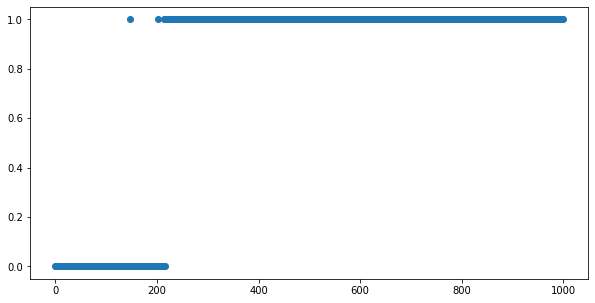

In [8]:
plt.scatter(range(n_eps),result_arr_1)
print(np.sum(result_arr_1))

## Q2 - Greedy - Linear Episolon 

In [9]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
result_arr_2 = []

epsilon = 1
epsilon_decay = 0.001
epsilon_array = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result_arr_2.append(0)
  

  while not done:

    # Exploration and explioration tradeoff with a linear epislon  
    if np.random.random() < epsilon:
      a = env.action_space.sample()
    else:
      a = np.argmax(q[s])

    n_s, reward, done, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (reward + lambda_ * np.max(q[n_s, :]) - q[s, a])
    s = n_s

    if reward:
      result_arr_2[-1] = reward
      break 

  epsilon_array.append(epsilon)
  epsilon = np.max(epsilon - epsilon_decay, 0)
  

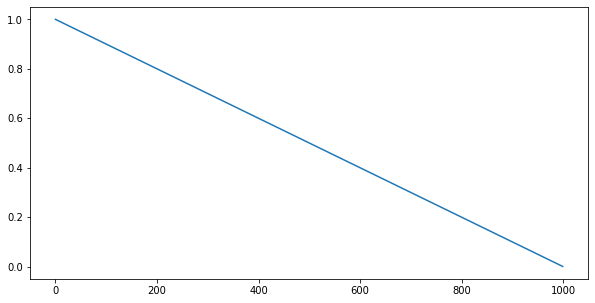

In [10]:
plt.plot(epsilon_array)

394.0


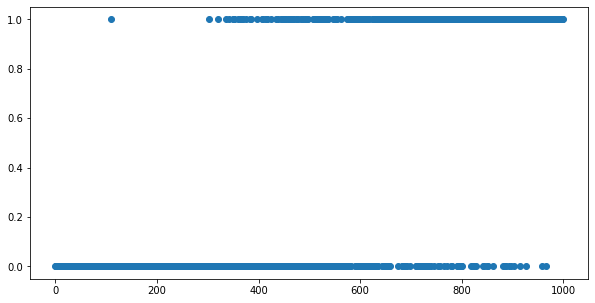

In [11]:
plt.scatter(range(n_eps),result_arr_2)
print(np.sum(result_arr_2))

## Q3 - Greedy - Exponetial Episolon

In [12]:
# Initialize Q-table
q = np.zeros((n_ob, n_act))

# Parameters
n_eps = 1000
alpha = .5
lambda_ = .9
result_arr_3 = []

epsilon = 1.0
epsilon_decay = 0.005
epsilon_array = []

# Training - Update Q values 
for eps in range(n_eps):
  s = env.reset()
  done = False
  result_arr_3.append(0)

  while not done:

    # Exploration and explioration tradeoff with a exponetial epislon  
    if np.random.random() < epsilon:
      a = env.action_space.sample()
    else:
      a = np.argmax(q[s])

    n_s, reward, done, info = env.step(a)
    q[s, a] = q[s, a] + alpha * (reward + lambda_ * np.max(q[n_s, :]) - q[s, a])
    s = n_s

    if reward:
      result_arr_3[-1] = reward
      break 
 
  epsilon_array.append(epsilon)
  epsilon = np.exp(-epsilon_decay * eps)

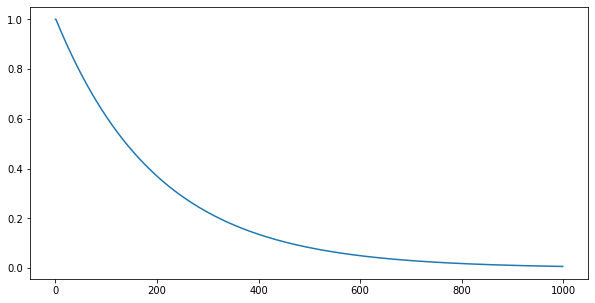

In [13]:
plt.plot(epsilon_array)

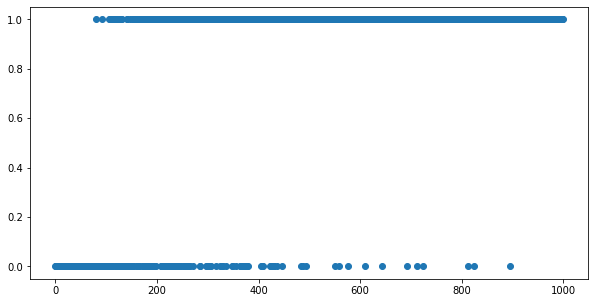

In [14]:
plt.scatter(range(n_eps),result_arr_3)

## Object-oriented Programming (OOP)


To do list:
- Logical writing & function trial, like action, step, new state display
- How to render for all eposides
- Other performance metrics
- Class for comparing different epsilon greedy optimization using time pacakage on baseline
- dqn implementation
- comparion between dqn and best q learning
- How can we ensure that all the result is reproduced


# References
- [Frozen Lake Official Documentation](https://www.gymlibrary.dev/environments/toy_text/frozen_lake/)
- [Q-learning for beginners
Train an AI to solve the Frozen Lake environment](https://mlabonne.github.io/blog/reinforcement%20learning/q-learning/frozen%20lake/gym/tutorial/2022/02/13/Q_learning.html)
- [DQN - Reinforcement Learning with Frozen Lake](https://martin-ueding.de/posts/reinforcement-learning-with-frozen-lake/)
- [Q-learning - taxi problem](https://github.com/MINGofHope/RL-Frozen-Leak/blob/master/ref_openai_gym_taxi_tutorial.ipynb)
- [DQN - taxi problem in lecture ](https://github.com/MINGofHope/RL-Frozen-Leak/blob/master/ref_DQN_Taxi_v3.ipynb)
- [Github tutorial if applicable](https://www.youtube.com/watch?v=RGOj5yH7evk)

# Project Management
Task Split & Time Arrangement 
- Report Draft
- Q Learing implemetation & Evaluation
- DQN implementation & Evaluation   🔔 (Oct 2, flexible)



# Problems that you have faced 